<a href="https://colab.research.google.com/github/shofwatunniswah/MarketingCampaign/blob/main/MarkCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import segala macam modul yang diperlukan
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi untuk keperluan Plotting PCA
sns.set(style="whitegrid")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Menggunakan path lengkap dari file di Google Drive
file_path = '/content/drive/My Drive/Colab Notebooks/MarkCamp.xls'

# Membaca file XLSX
df = pd.read_excel(file_path)

# Menampilkan beberapa baris pertama data
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [ ]:
# Menampilkan informasi umum tentang dataset
print(df.info())


# Menampilkan statistik deskriptif dasar
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace({
    'Widow': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single',
    'YOLO': 'Single',
    'Divorced' : 'Single',
    'Together' : 'Married'
})

In [ ]:
# Encoding Kategori Data
df = pd.get_dummies(df, columns=['Marital_Status', 'Education'])

In [ ]:
df.shape

(2240, 34)

In [ ]:
df.isnull().any(axis=1).sum()

24

In [ ]:
df.isnull().any(axis=0)

ID                        False
Year_Birth                False
Income                     True
Kidhome                   False
Teenhome                  False
Dt_Customer               False
Recency                   False
MntWines                  False
MntFruits                 False
MntMeatProducts           False
MntFishProducts           False
MntSweetProducts          False
MntGoldProds              False
NumDealsPurchases         False
NumWebPurchases           False
NumCatalogPurchases       False
NumStorePurchases         False
NumWebVisitsMonth         False
AcceptedCmp3              False
AcceptedCmp4              False
AcceptedCmp5              False
AcceptedCmp1              False
AcceptedCmp2              False
Complain                  False
Z_CostContact             False
Z_Revenue                 False
Response                  False
Marital_Status_Married    False
Marital_Status_Single     False
Education_2n Cycle        False
Education_Basic           False
Educatio

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      2240 non-null   int64         
 1   Year_Birth              2240 non-null   int64         
 2   Income                  2216 non-null   float64       
 3   Kidhome                 2240 non-null   int64         
 4   Teenhome                2240 non-null   int64         
 5   Dt_Customer             2240 non-null   datetime64[ns]
 6   Recency                 2240 non-null   int64         
 7   MntWines                2240 non-null   int64         
 8   MntFruits               2240 non-null   int64         
 9   MntMeatProducts         2240 non-null   int64         
 10  MntFishProducts         2240 non-null   int64         
 11  MntSweetProducts        2240 non-null   int64         
 12  MntGoldProds            2240 non-null   int64   

In [ ]:
print(df.describe())

                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruits  \
count                           2240  2240.000000  2240.000000  2240.000000   
mean   2013-07-10 10:01:42.857142784    49.109375   303.935714    26.302232   
min              2012-07-30 00:00:00     0.000000     0.000000     0.

In [ ]:
print(df)

         ID  Year_Birth   Income  Kidhome  Teenhome Dt_Customer  Recency  \
0      5524        1957  58138.0        0         0  2012-09-04       58   
1      2174        1954  46344.0        1         1  2014-03-08       38   
2      4141        1965  71613.0        0         0  2013-08-21       26   
3      6182        1984  26646.0        1         0  2014-02-10       26   
4      5324        1981  58293.0        1         0  2014-01-19       94   
...     ...         ...      ...      ...       ...         ...      ...   
2235  10870        1967  61223.0        0         1  2013-06-13       46   
2236   4001        1946  64014.0        2         1  2014-06-10       56   
2237   7270        1981  56981.0        0         0  2014-01-25       91   
2238   8235        1956  69245.0        0         1  2014-01-24        8   
2239   9405        1954  52869.0        1         1  2012-10-15       40   

      MntWines  MntFruits  MntMeatProducts  ...  Z_CostContact  Z_Revenue  \
0         

In [ ]:
df = df.dropna()

In [ ]:
df.shape

(2216, 34)

In [ ]:
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Response,Marital_Status_Married,Marital_Status_Single,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,5524,1957,58138.0,0,0,2012-09-04,58,635,88,546,...,3,11,1,False,True,False,False,True,False,False
1,2174,1954,46344.0,1,1,2014-03-08,38,11,1,6,...,3,11,0,False,True,False,False,True,False,False
2,4141,1965,71613.0,0,0,2013-08-21,26,426,49,127,...,3,11,0,True,False,False,False,True,False,False
3,6182,1984,26646.0,1,0,2014-02-10,26,11,4,20,...,3,11,0,True,False,False,False,True,False,False
4,5324,1981,58293.0,1,0,2014-01-19,94,173,43,118,...,3,11,0,True,False,False,False,False,False,True


In [ ]:
# Mendrop kolom dataset yang
# tidak diperlukan dalam klustering nanti
df = df.drop(columns=['ID', 'Dt_Customer', 'Year_Birth', 'Education_Basic', 'Education_2n Cycle', 'Education_Graduation', 'Education_Master', 'Education_PhD', 'Z_CostContact', 'Z_Revenue', 'Complain'], axis=1)

In [ ]:
df.shape

(2216, 23)

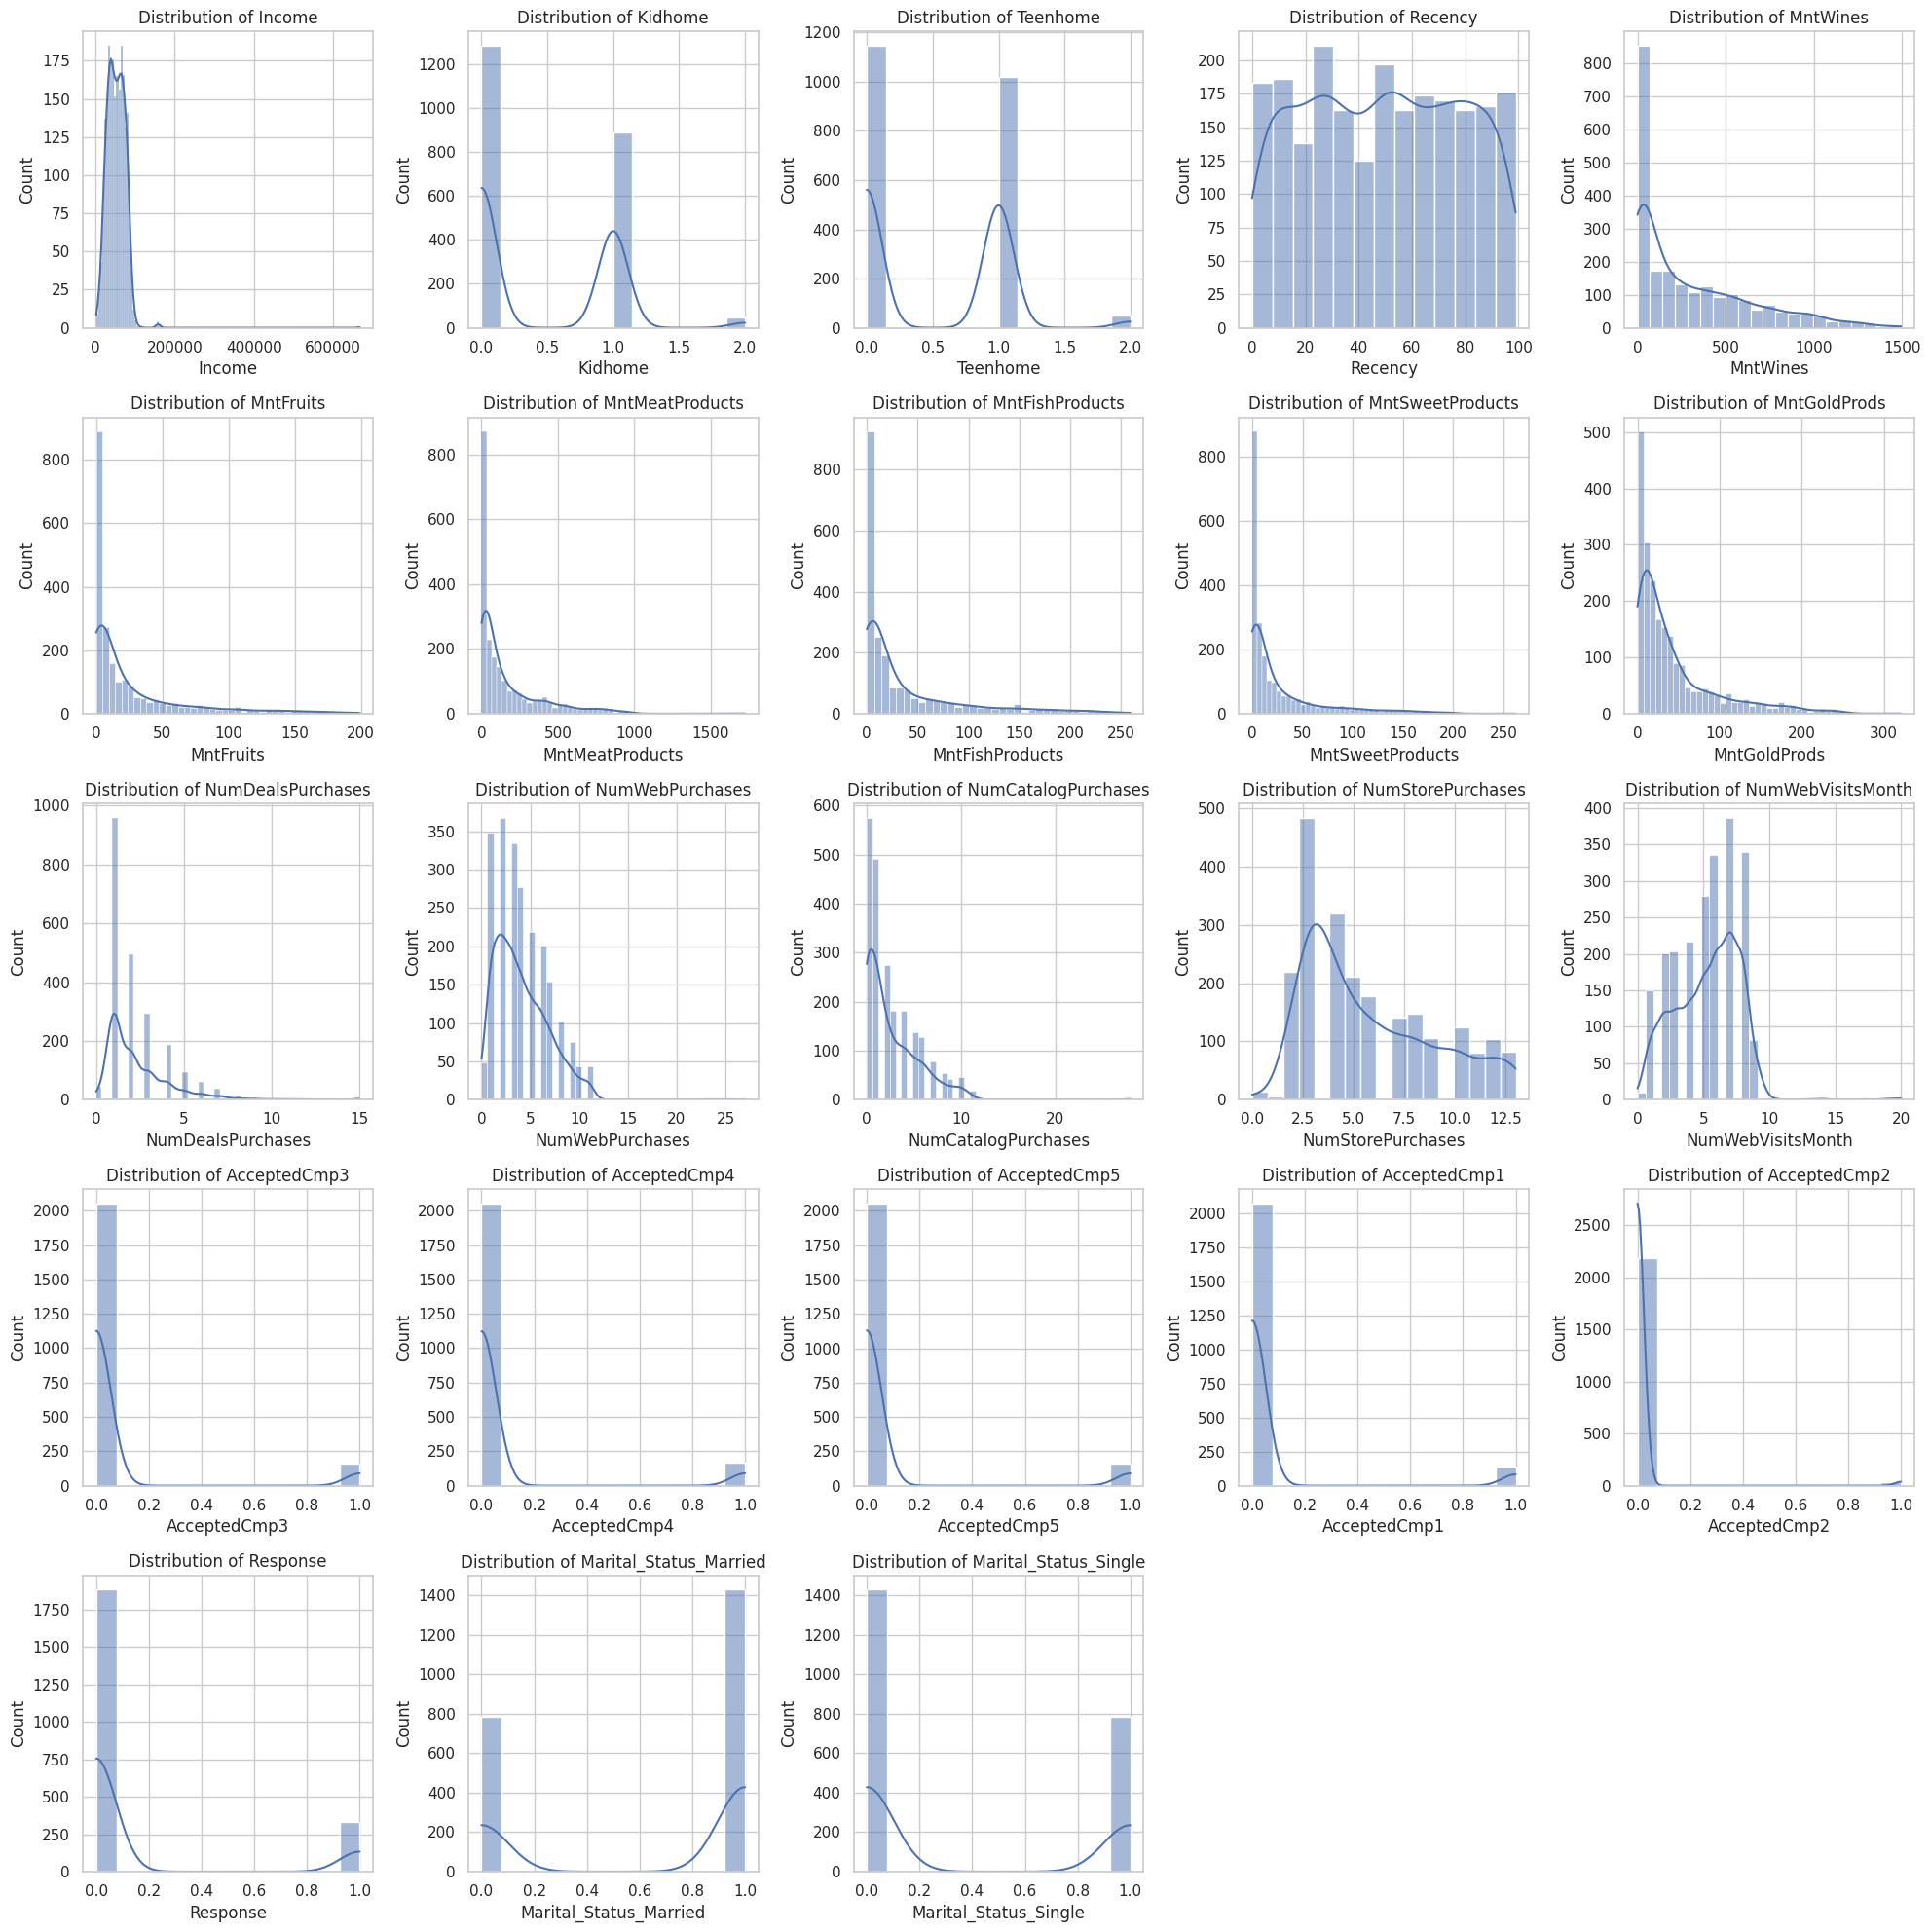

In [ ]:

# Mengonversi kolom boolean menjadi numerik
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)
# Melihat distribusi kolom numerik
num_cols = df.select_dtypes(include=[np.number]).columns
num_plots = len(num_cols)
cols = 5
rows = int(np.ceil(num_plots / cols))

plt.figure(figsize=(20, rows * 4))
for i, column in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


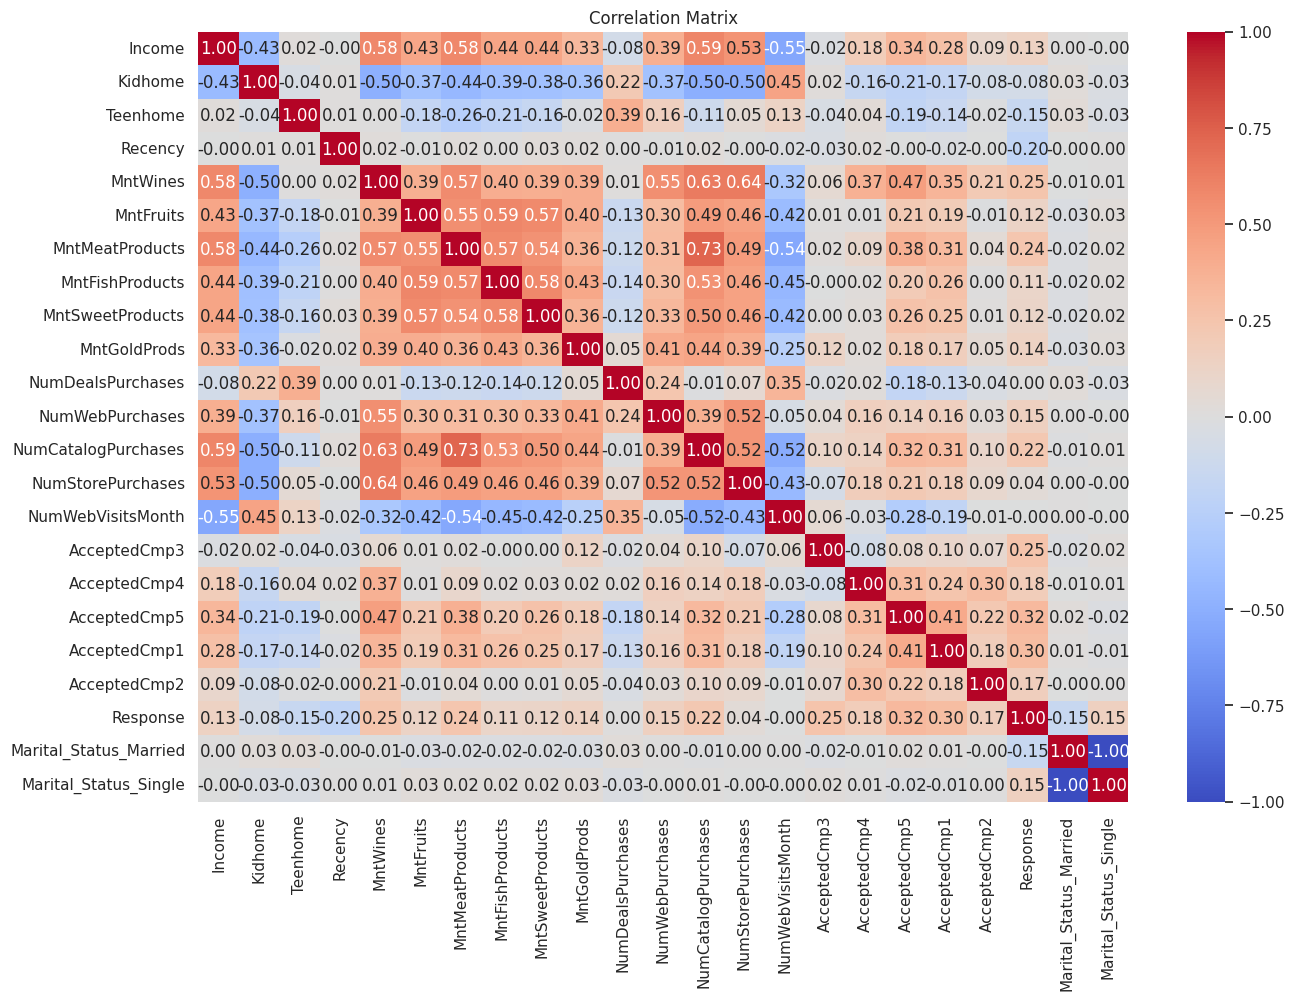

In [ ]:
# Melihat korelasi antar variabel numerik
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

In [ ]:
# Min-Max Scaling
minmax_scaler = MinMaxScaler()
minmax_scaled_features = minmax_scaler.fit_transform(df)